<a href="https://colab.research.google.com/github/aaalok5106/DL_Project/blob/master/fracture_dect1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

In [2]:
# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/DL_Project"

dataset        temp			 Untitled0.ipynb
MURA-v1.1.zip  train_filepath_label.txt  valid_filepath_label.txt


In [2]:
!ls

drive  MURA-v1.1  sample_data


In [0]:
!unzip "/content/drive/My Drive/DL_Project/MURA-v1.1.zip"

In [7]:
!du -sh "/content/MURA-v1.1"

3.4G	/content/MURA-v1.1


In [0]:
import IPython.display as display
from __future__ import absolute_import, division, print_function

import tensorflow as tf

import pandas as pd
from os import listdir
from os.path import isfile, join

In [6]:
!ls

drive  MURA-v1.1  sample_data


In [0]:
def load_data(filename):
  data = pd.read_csv('./MURA-v1.1/'+filename, sep = ",", header = None)
  data.columns = ["datapath","label"]
  return data

In [0]:
data = load_data('train_labeled_studies.csv')
path = []
label = []
for i, j in data.iterrows():
  mypath = './' + j['datapath']
  onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))] 
  for k in onlyfiles:
    #print( j['datapath']+k, j['label'] )
    path.append(j['datapath']+k)
    label.append(j['label'])

label_value = ['not_fractured', 'fractured']

In [9]:
label_value

['not_fractured', 'fractured']

In [0]:
count = 0
for i in range(len(label)):
  count = count + 1
  if(count < 50):
    print(path[i] + "\t" + str(label[i]))
    #display.display(display.Image(path[i]))

In [0]:
# f = open("/content/drive/My Drive/DL_Project/train_filepath_label.txt", "w")
# for i in range(len(label)):
#     temp = path[i] + "\t" + str(label[i])
#     #print(temp)
#     f.write(temp + "\n")
# f.close()

In [0]:
#!cat "/content/drive/My Drive/DL_Project/train_filepath_label.txt"

In [0]:
data = load_data('valid_labeled_studies.csv')
path_valid = []
label_valid = []
for i, j in data.iterrows():
  mypath = './' + j['datapath']
  onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))] 
  for k in onlyfiles:
    path_valid.append(j['datapath']+k)
    label_valid.append(j['label'])

In [17]:
count = 0
for i in range(len(label)):
  count = count + 1
  if(count < 10):
    print(path_valid[i] + "\t" + str(label_valid[i]))
    #display.display(display.Image(path_valid[i]))

MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image3.png	1
MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image4.png	1
MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image2.png	1
MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image1.png	1
MURA-v1.1/valid/XR_WRIST/patient11186/study1_positive/image2.png	1
MURA-v1.1/valid/XR_WRIST/patient11186/study1_positive/image1.png	1
MURA-v1.1/valid/XR_WRIST/patient11186/study2_positive/image3.png	1
MURA-v1.1/valid/XR_WRIST/patient11186/study2_positive/image2.png	1
MURA-v1.1/valid/XR_WRIST/patient11186/study2_positive/image1.png	1


In [0]:
# f = open("/content/drive/My Drive/DL_Project/valid_filepath_label.txt", "w")
# for i in range(len(label_valid)):
#     temp = path_valid[i] + "\t" + str(label_valid[i])
#     #print(temp)
#     f.write(temp + "\n")
# f.close()

In [0]:
#!cat "/content/drive/My Drive/DL_Project/valid_filepath_label.txt"

In [0]:
import cv2
from tqdm import tqdm

In [20]:
!ls

drive  MURA-v1.1  sample_data


In [21]:
!du -sh "/content/drive/My Drive/DL_Project/dataset/MURA-v1.1"

^C


In [6]:
!ls -l "/content/drive/My Drive/DL_Project/dataset/MURA-v1.1/"

total 3410
drwx------ 9 root root    4096 Apr 18 22:54 train
-rw------- 1 root root 2423416 Aug 20  2018 train_image_paths.csv
-rw------- 1 root root  778367 Aug 20  2018 train_labeled_studies.csv
drwx------ 9 root root    4096 Apr 18 22:53 valid
-rw------- 1 root root  210674 Aug 20  2018 valid_image_paths.csv
-rw------- 1 root root   69469 Aug 20  2018 valid_labeled_studies.csv


In [7]:
import os
import pprint
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

TPU address is grpc://10.12.210.2:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 2507236333395426125),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 15464962281317413747),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 11248967432684262263),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 16475557513806160393),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 17428645771128786527),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 12956162779786239193),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 16242062214240643995),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 11145879551395548292),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 1267497199

In [26]:
path[:20]

['MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image3.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image1.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image3.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image2.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/image1.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/image3.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/image4.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/image2.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/image1.png',
 'MURA-v1.1/train/XR_SHOULDER/patient00005/study1_positive/image

In [27]:
label[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

In [28]:
path_valid[:20]
label_valid[:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [45]:
!ls '/content/MURA-v1.1/train/XR_WRIST/patient07840/study1_negative/'


image1.png


In [0]:
import os # Miscellaneous operating system interfaces...file and directory related operations among others
from numpy import * #package for scientific computing

In [0]:
# size of image
row, col = 64, 64
channel = 1
bdir = '/content/'

In [0]:
# pre processing of images

from PIL import Image

gray_list = []



  
# gray_list[5]




In [11]:
# train skip i = 25001, 25003, 25005, 25006
exclude = [25001, 25003, 25005, 25006]

for i in range(len(path)):
  if not i in exclude:
    im = Image.open(bdir + path[i])

    img = im.resize((row, col))
    gray=img.convert('L')
    gray_list.append(gray)

path[25001]

'MURA-v1.1/train/XR_WRIST/patient07840/study1_negative/._image1.png'

In [31]:
label[25001]

0

In [12]:
len(gray_list)

36808

In [13]:
len(label)

36812

In [0]:
# img_mat = array([])
# tt=array(gray).flatten()
# img_mat.append(tt)
# print(img_mat)


# img_mat=array([array(gray_im).flatten() 
#            for gray_im in gray_list],'f')

#flatten all the images into one matrix
img_mat=array([array(gray_im).flatten() for gray_im in gray_list],'f')

In [15]:
print(img_mat)

[[ 58.  39.  35. ...  91.  91.  92.]
 [  0.   0. 115. ... 168. 165. 166.]
 [  6.   7.   8. ...   5.   5.   5.]
 ...
 [ 27.  29.  26. ...  26.  26.  26.]
 [ 21.  23.  20. ...  24.  25.  25.]
 [ 22.  25.  28. ...   4.   4.   4.]]


In [16]:
len(img_mat)

36808

In [17]:
# train skip i = 25001, 25003, 25005, 25006

label_train = []
for i in range(len(label)):
  if not i in exclude:
    label_train.append(label[i])

len(label_train)



36808

In [0]:
del gray_list

In [0]:
del label

In [0]:
from sklearn.utils import shuffle
#make sample label pairs
data1,label1=shuffle(img_mat,label_train)

In [21]:
print (len(data1), len(label1))

36808 36808


In [0]:
train_data = [data1, label1]


In [0]:
del img_mat

In [0]:
del data1

In [25]:
print(len(train_data[0]), train_data[1][0])

36808 0


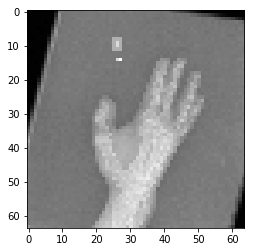

In [26]:
import matplotlib.pyplot as plt

check_img=train_data[0][111].reshape(row,col)
plt.imshow(check_img)
plt.imshow(check_img,cmap='gray')

In [0]:
batch_size=20
n_classes=2
n_epochs=2
channels=1 # no. of imagae channels
n_filters=32 #no. of conv filters to use
n_pool=2  #size of area for max pooling
n_conv=3  #size of conv kernel

(X,Y)=(train_data[0],train_data[1])  

In [28]:
print(X, Y)

[[33. 33. 35. ... 36. 34. 33.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [62. 54. 51. ... 52. 55. 54.]
 ...
 [79. 79. 80. ... 71. 68. 71.]
 [57. 49. 49. ... 99. 97. 94.]
 [60. 47. 47. ... 52. 53. 63.]] [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

In [30]:
from sklearn.model_selection import train_test_split
# preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=4)
X_train=X_train.reshape(X_train.shape[0],1,row,col)
# print(X_train.shape)
X_test=X_test.reshape(X_test.shape[0],1,row,col)
# print(X_test.shape)

X_train/=255
X_test/=255

# following steps make one hot matrix used by the model to fit data
# print(Y_train.shape)   #current shape
# print(Y_test.shape)

from keras.utils import np_utils
Y_train=np_utils.to_categorical(Y_train,n_classes)
Y_test=np_utils.to_categorical(Y_test,n_classes)
#print Y_train.shape
#print Y_test.shape
#print Y_test

Using TensorFlow backend.


label: [1. 0.]


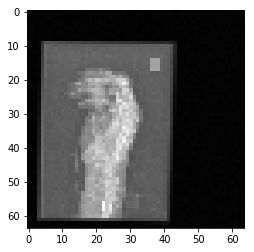

In [31]:
# test the modifations of data and lables

plt.imshow(X_train[112,0],interpolation='nearest',cmap='gray')
print("label:",Y_train[112,:])

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import backend as K
K.set_image_data_format('channels_first') # set format


In [33]:
# deifne the model layout
model=Sequential()  #type of model

#add layers to the model

model.add(Convolution2D(n_filters,n_conv,n_conv,border_mode='valid',input_shape=(1,row,col)))
convol1=Activation('relu')
model.add(convol1)
model.add(Convolution2D(n_filters,n_conv,n_conv))
convol2=Activation('relu')
model.add(convol2)
model.add(MaxPooling2D(pool_size=(n_pool,n_pool)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 64, 64..., padding="valid")`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [34]:
# compile the model

model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

# print the model summary

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 62, 62)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 62, 62)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 60, 60)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 60, 60)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 30, 30)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 30, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
__________

In [35]:
# train the model

trainin=model.fit(X_train,Y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 33127 samples, validate on 3681 samples
Epoch 1/2
33127/33127 [==============================] - 624s 19ms/step - loss: 0.6588 - acc: 0.6058 - val_loss: 0.6467 - val_acc: 0.6167
Epoch 2/2
33127/33127 [==============================] - 621s 19ms/step - loss: 0.6351 - acc: 0.6339 - val_loss: 0.7018 - val_acc: 0.6066


In [36]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7017973144436233
Test accuracy: 0.606628633523499


In [41]:
print(X_test[0][0][0])

[0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157 0.00392157
 0.         0.00392157 0.         0.         0.00392157 0.00392157
 0.00392157 0.00392157 0.00392157 0.00392157 0.         0.
 0.         0.         0.00392157 0.00392157 0.00392157 0.
 0.00392157 0.         0.         0.00392157 0.00392157 0.00392157
 0.         0.00392157 0.00392157 0.         0.         0.
 0.00392157 0.         0.         0.         0.         0.00392157
 0.00392157 0.         0.         0.00392157 0.         0.
 0.00392157 0.00392157 0.00392157 0.00392157 0.         0.00392157
 0.         0.00392157 0.00392157 0.        ]


In [45]:
!ls

drive  model1.h5  MURA-v1.1  sample_data


In [47]:
!ls "/content/drive/My Drive/DL_Project/"

dataset    MURA-v1.1.zip  train_filepath_label.txt  valid_filepath_label.txt
model1.h5  temp		  Untitled0.ipynb


In [0]:
model.summary()

In [0]:
# single image testing

from keras.models import load_model

model_test = load_model('/content/drive/My Drive/DL_Project/model1.h5')



In [76]:
model_test.compile(loss='binary_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

score = model_test.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.701797320673693
Test accuracy: 0.606628633523499


In [79]:
score

[0.701797320673693, 0.606628633523499]